In [1]:
import pandas as pd
import numpy as pd
from logreg_functions import *
from knapsack_functions import *

In [2]:
full_df = build_training_set(num_instances=10000, num_items = 5)

121.0 IS THE OPTIMAL VALUE
95.0 IS THE OPTIMAL VALUE
82.0 IS THE OPTIMAL VALUE
89.0 IS THE OPTIMAL VALUE
90.0 IS THE OPTIMAL VALUE
62.0 IS THE OPTIMAL VALUE
95.0 IS THE OPTIMAL VALUE
102.0 IS THE OPTIMAL VALUE
92.0 IS THE OPTIMAL VALUE
110.0 IS THE OPTIMAL VALUE
71.0 IS THE OPTIMAL VALUE
127.0 IS THE OPTIMAL VALUE
67.0 IS THE OPTIMAL VALUE
102.0 IS THE OPTIMAL VALUE
84.0 IS THE OPTIMAL VALUE
75.0 IS THE OPTIMAL VALUE
74.0 IS THE OPTIMAL VALUE
118.0 IS THE OPTIMAL VALUE
114.0 IS THE OPTIMAL VALUE
82.0 IS THE OPTIMAL VALUE
133.0 IS THE OPTIMAL VALUE
92.0 IS THE OPTIMAL VALUE
140.0 IS THE OPTIMAL VALUE
73.0 IS THE OPTIMAL VALUE
90.0 IS THE OPTIMAL VALUE
99.0 IS THE OPTIMAL VALUE
114.0 IS THE OPTIMAL VALUE
87.0 IS THE OPTIMAL VALUE
118.0 IS THE OPTIMAL VALUE
131.0 IS THE OPTIMAL VALUE
91.0 IS THE OPTIMAL VALUE
112.0 IS THE OPTIMAL VALUE
112.0 IS THE OPTIMAL VALUE
108.0 IS THE OPTIMAL VALUE
96.0 IS THE OPTIMAL VALUE
120.0 IS THE OPTIMAL VALUE
78.0 IS THE OPTIMAL VALUE
52.0 IS THE OPTIMAL VA

/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/knapsack_functions.py:651: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(all_dfs, ignore_index=True)


In [3]:
# Suppose full_df is your big dataset (from build_training_set)
clf, metrics, data = train_logreg(full_df)
print(metrics)

{'roc_auc': 0.9839888115807858, 'accuracy': 0.934804603515872, 'f1': 0.8496134584528614}


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encou

In [4]:
X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]

coef_df = inspect_logreg_coefficients(clf, X_train)

                 feature      coef
23         has_incumbent -2.876123
8    total_value_fixed_1  2.135932
25          node_rel_gap -1.927871
24              node_gap -1.781523
18   branch_parent_value -1.419983
16     branch_parent_dir -0.883857
4            num_fixed_1 -0.827729
22         incumbent_val -0.788502
1           lp_objective  0.656549
14     frac_var_fraction -0.580893
6              fix_ratio -0.552540
0                  depth -0.552540
3              num_fixed -0.552540
2                  slack -0.511600
7   total_weight_fixed_1 -0.471606
17  branch_parent_weight  0.356790
11       frac_var_weight -0.210976
12        frac_var_value -0.147336
20             visit_idx  0.140085
21      open_nodes_count  0.130110
5            num_fixed_0  0.130110
19   branch_parent_ratio  0.113261
13        frac_var_ratio -0.026290
15     branch_parent_var  0.013302
10   frac_var_normalized -0.008131
9         frac_var_index -0.008131


In [5]:
probs, preds = prediction_distribution(clf, X_test)

Proportion predicted 1: 0.2411154673074491


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


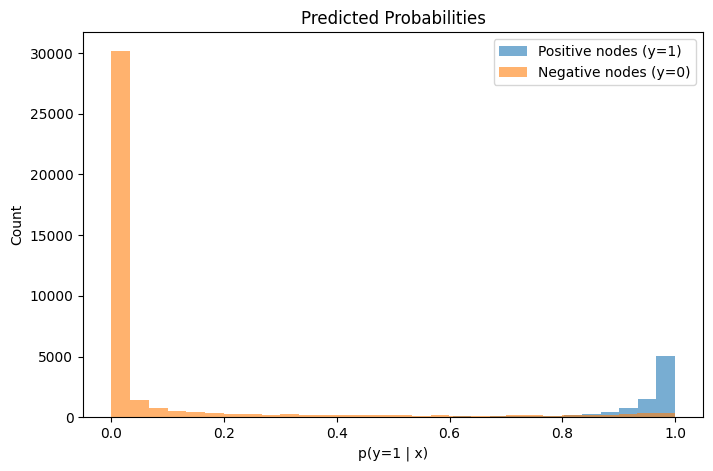

In [6]:
import matplotlib.pyplot as plt

def plot_probability_histogram(probs, y_test):
    plt.figure(figsize=(8,5))
    plt.hist(probs[y_test==1], bins=30, alpha=0.6, label="Positive nodes (y=1)")
    plt.hist(probs[y_test==0], bins=30, alpha=0.6, label="Negative nodes (y=0)")
    plt.legend()
    plt.title("Predicted Probabilities")
    plt.xlabel("p(y=1 | x)")
    plt.ylabel("Count")
    plt.show()

plot_probability_histogram(probs, y_test)

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print(cm)


[[35612  2702]
 [  391  8737]]


In [8]:
# run a lasso to increase sparcity
# miplib 1.0 -  to incease variance across instances
# decision model to choosing between our logreg probability and standard heuristics
# higher order moments - skew, curtosis
# number of nodes explored as a metric of faster solving

# MOST IMPORTANT - generate huge amt of training data across a bunch of different IP types